In [4]:
# Plot inline
%matplotlib inline

In [95]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pymongo
import seaborn
from tqdm import tqdm
from pymongo import MongoClient

In [120]:
data = pd.read_json(r'firstdata.json')
#data = df.head(20_000)

KeyboardInterrupt: 

In [98]:
# Plot configuration
seaborn.set_style("whitegrid")
# Font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Fira Sans'

# Count tweets

In [16]:
# Prepare a list of our hashtags
#hashtags = u"tech for good, #techforgood, #tech4good, civic tech, #civictech, digital social innovation, #NGOtech, #ngotech, #nptech, #nonprofittech, #socialtech, #goodtech, Digital democracy, Démocratie Numérique, democrazia digitale, digitale Demokratie, democracia digital, digitaalidemokratia, digitalt demokrati, ψηφιακή δημοκρατία, digitale democratie, digitálna demokracia, democrația digitală, Democracia virtual, digitalna demokracija, interneta demokrātija, #skaitmeninedemokratija, digitális demokrácia, digitální demokracie, цифрова демокрация, digital demokrati, digitaalseks demokraatiaks, demokrazija diġitali, demokracjacyfrowa, elektronička demokracija, daonlathas digiteach, e-democracy, e-démocratie, democrazia elettronica, e-Demokratie, democracia electrónica, Elektroninen demokratia, e-demokrati, Ηλεκτρονική δημοκρατία, e-democratie, e-demokracia, e-democrația, e-democracia, e-demokracija, E-demokrātija, e-demokratija, Az e-demokrácia, e-demokracie, е-демокрация, E-demokrati, e-demokraatia, e-demokrazija, e-demokracja, E-demokracija, e-daonlathas, open data, Données ouvertes, dati aperti, Offene Daten, Datos abiertos, Avoin data, Åbn data, ανοιχτά δεδομένα, otvorené dáta, date deschise, dados abertos, odprti podatki, atveriet datus, atviri duomenys, nyitott adatok, Otevřená data, отворени данни, Öppna data, Avaandmed, data miftuħa, otwarte dane, otvoreni podaci, sonraí oscailte, open hardware, Matériel ouvert, hardware libero, offene Hardware, hardware libre, Avoin laitteisto, åben hardware, ανοιχτό υλικό, otvorený hardvér, Open Hardware, sursa deschisa, hardware livre, odprta strojna oprema, atvērt aparatūru, atvira technine iranga, nyitott hardver, otevřený hardware, отворен хардуер, Öppen hårdvara, avatud riistvara, ħardwer miftuħ, open hardware, otvoreni hardver, crua-earraí oscailte, open source, code source ouvert, fonte aperta, offene Quelle, código abierto, Avoin lähdekoodi, åben kildekode, Ανοικτός Κώδικας, sursă deschisă, código aberto, Odprta koda, Atvērtais pirmkods, atviras resursas, nyílt forráskód, отворен код, Öppen källkod, Avatud lähtekood, sors miftuħ, otwarte źródło, Otvoreni kod, Foinse oscailte, open government, gouvernement ouvert, governoaperto, offene Regierung, gobierno abierto, avoin hallitus, åben regering, ανοικτή κυβέρνηση, open overheid, otvorená vláda, guvern deschis, governo aberto, odprta vlada, atvērta valdība, atvira vyriausybė, nyitott kormány, otevřená vláda, отворено, правителство, öppen regering, avatud valitsus, gvern miftuħ, otwarty rząd, otvorena vlada, rialtas oscailte"
#hashtags_list = hashtags.split(", ")

In [99]:
hashtags = u"open source, #opensource"
hashtags_list = hashtags.split(", ")

In [100]:
# Add an empty column for each hashtag for categorizing tweets by our hashtags
for i in hashtags_list:
    data[i] = 0

In [101]:
# Iterate over rows to categorize tweets by the presence of our hashtags
# This is done by adding +1 to the value of the hashtag column, so that it can be easily plotted later
for index, row in data.iterrows():
    for word in hashtags_list:
        try:
            if word in row['text'].lower():
                data.at[index, word] = row[word] + 1
        except:
            pass

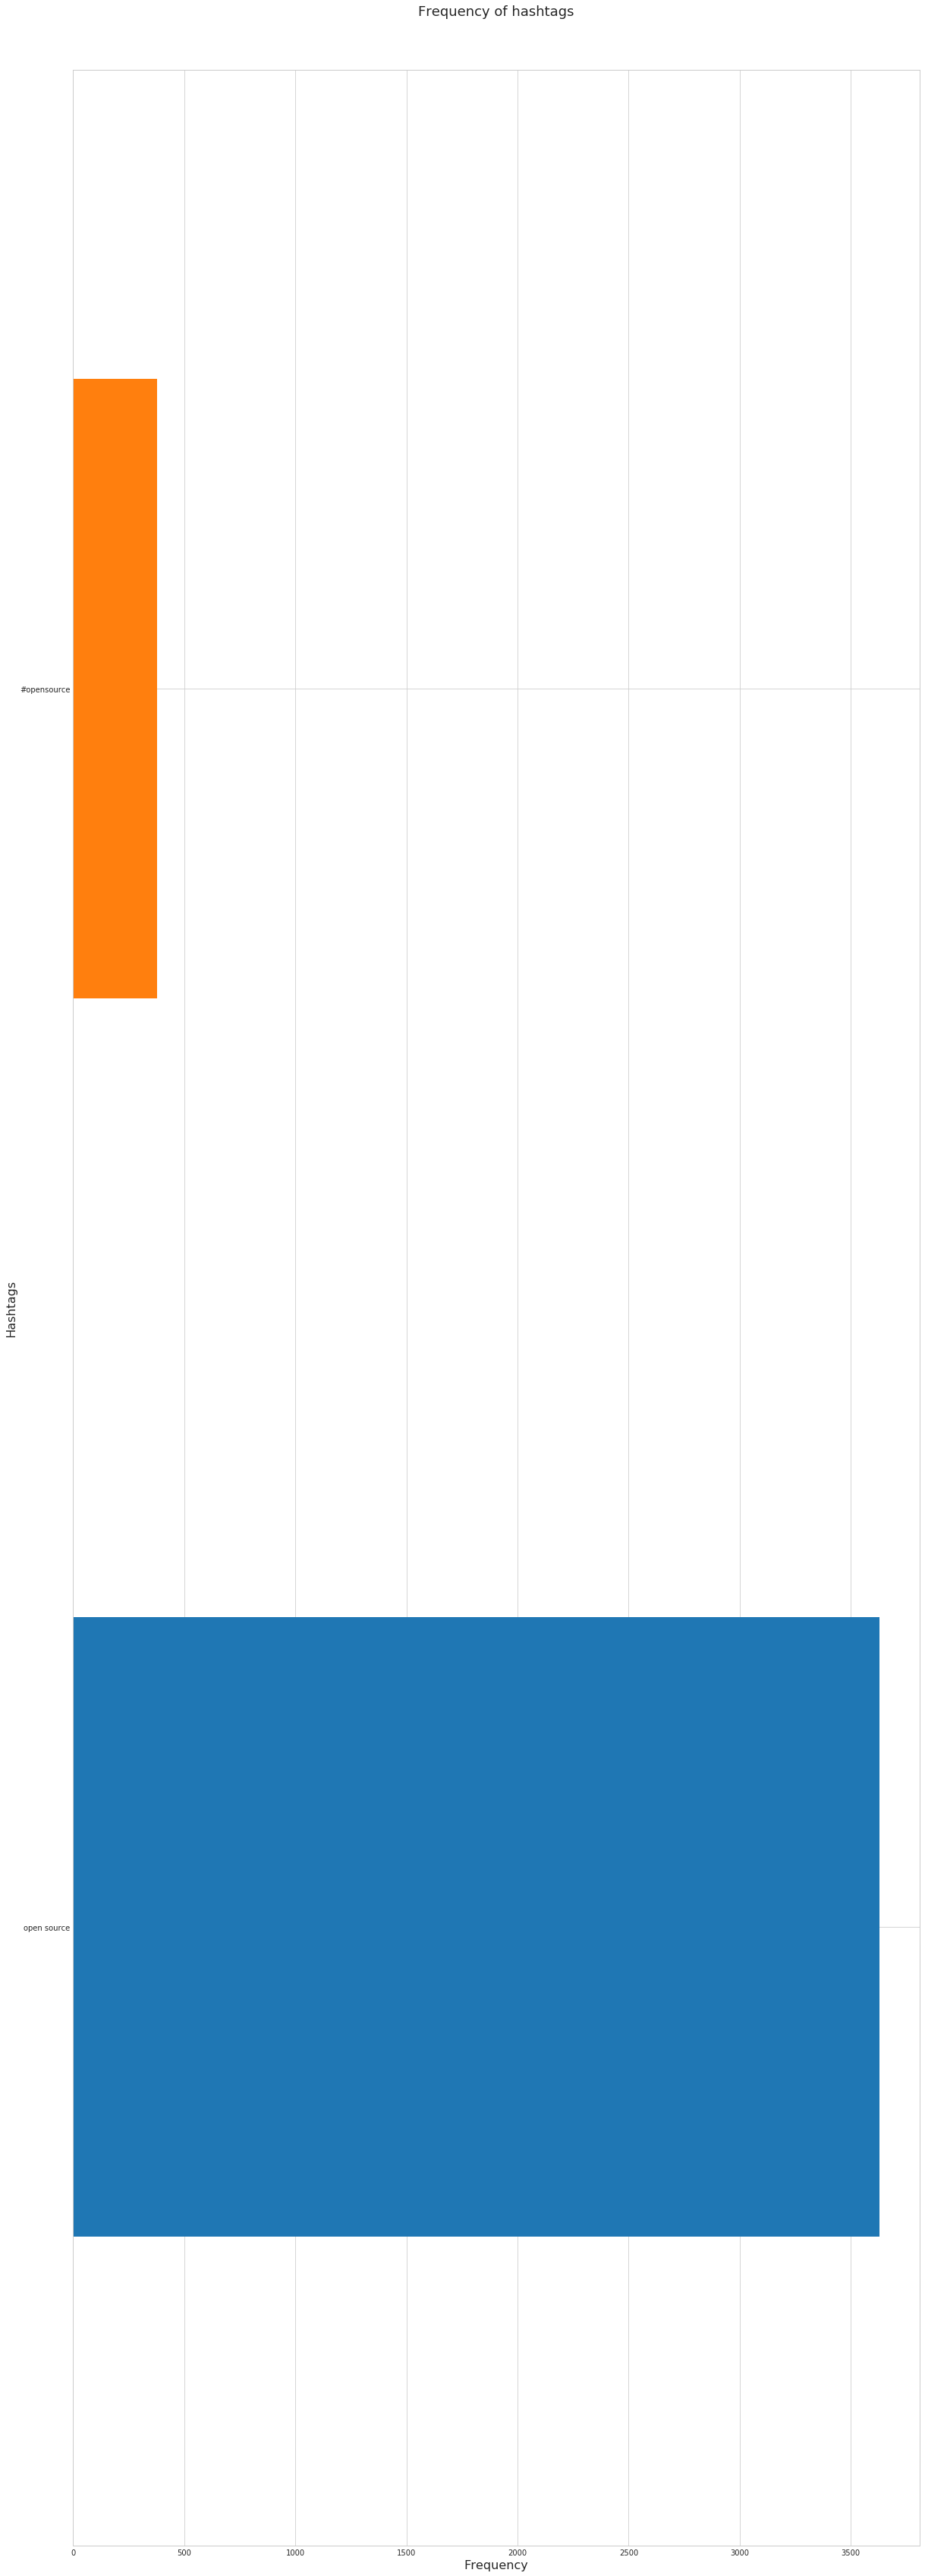

In [102]:
import warnings
warnings.filterwarnings('ignore')
# Plot: see the frequency of the hashtags
plt.figure(figsize=(16,6))
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Hashtags', fontsize=16)
plt.title("Frequency of hashtags", fontsize=18, y=1.02)
data[hashtags_list].sum().plot(figsize=(20,60), kind="barh")
plt.savefig(u"tweets02.pdf")

In [106]:
df2 = data[(data['open source']==1)|(data['#opensource']==1)]

In [107]:
len(df2)

3724

In [108]:
df2.columns[0:10]
df2.to_csv(r'data_opensource.csv')

# Tweets over time

In [115]:
data = df2

In [116]:
# Transform the time column into datetime
data["time"] = pd.to_datetime(data["created_at"])

In [117]:
# Set the time as the index
data.set_index('time', inplace=True)

In [118]:
# Add a column for plotting count of tweets
data["count"] = 1

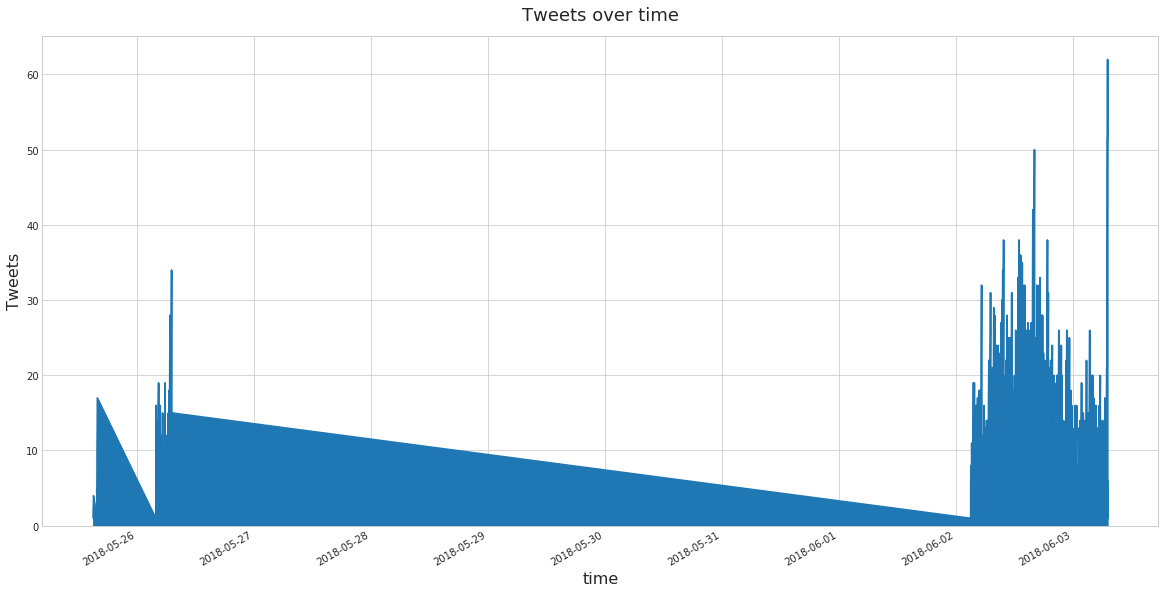

In [119]:
# Plot, resampled each 10 minutes
plt.figure(figsize=(16,6))
plt.xlabel('Time', fontsize=16)
plt.ylabel('Tweets', fontsize=16)
plt.title("Tweets over time", fontsize=18, y=1.02)
data.resample('10T')["count"].cumsum().plot(figsize=(20,10), kind="area")
plt.savefig(u"tweets01.pdf")